In [57]:
import numpy as np
import numpy.testing as npt
from scipy.linalg import expm
import matplotlib.pyplot as plt
import scipy.spatial, scipy.linalg
from scipy.spatial.distance import pdist
import scipy.sparse.linalg
from scipy.linalg import eigh
import zipfile,io
import pandas as pd
import zipfile
import re
import time
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
%matplotlib inline


## 8.1 Simulated Annealing

imulated annealing can be used to optimize a cost function $E : s \rightarrow R$ where the state s is a set of discrete state variables $s_i \in (−1, +1), i = 1,...., N$ . For a fully connected “network” with $N = 6$ binary nodes, this means that $s \in  (−1, +1)^6$, and we will use the cost (“energy”)

In [58]:
def E(s,W):
    return -(s*np.dot(W,s)).sum(0)/2

def Es(si,s,i,W):
    return -(si*np.dot(W,s)[i])/2


def flipP(s,i,beta,W):
    de = Es(-s[i],s,i,W)-Es(s[i],s,i,W)
    pr=(1/(1+np.exp(beta*de)))[0]
    c=np.random.choice([-1,1],1,p=[pr,1-pr])
    return s[i]*c

### Initialization:

In [59]:
M =[1,500]
s = np.random.choice([-1,1],6)
W = np.array([[ 0.         , 0.34537651, -0.27912426,  1.13818795, -0.78197224,  0.5576804 ],
 [ 0.34537651,  0.         , 0.23829984,  0.15651891,  1.58083954, -0.40823943],
 [-0.27912426,  0.23829984 , 0.         , 0.06297639,  0.30111993, -0.11186265],
 [ 1.13818795,  0.15651891,  0.06297639,  0.        , -0.49991177, -0.65784847],
 [-0.78197224,  1.58083954,  0.30111993, -0.49991177,  0.         , 0.50802284],
 [ 0.5576804 , -0.40823943 ,-0.11186265, -0.65784847,  0.50802284  ,0.        ]])
t_max = 30
beta = 0.1
tau = 1.23

In [60]:
s

array([ 1,  1,  1,  1, -1,  1])

### Optimization: M=1

In [61]:
Tm1 = np.empty(t_max)
Em1 = np.empty(t_max)
for t in range(t_max):
    Tm1[t]=1/beta
    for m in range(M[0]):
        i = np.random.choice(6,1)
        s[i]=flipP(s,i,beta,W)
    Em1[t]= E(s,W)
    beta = beta*tau

In [62]:
s

array([ 1, -1, -1,  1, -1, -1])

### Plotting: M=1

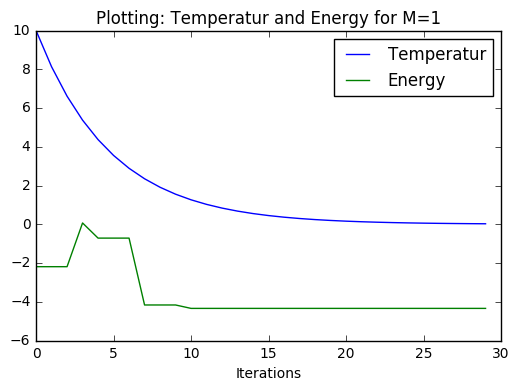

In [63]:
plt.plot((np.arange(t_max)),Tm1,label='Temperatur')
plt.plot((np.arange(t_max)),Em1,label='Energy')
plt.legend()
plt.title("Plotting: Temperatur and Energy for M=1")
plt.xlabel('Iterations')

### Initialization:

In [64]:
M =[1,500]
s = np.random.choice([-1,1],6)
W = np.array([[ 0.         , 0.34537651, -0.27912426,  1.13818795, -0.78197224,  0.5576804 ],
 [ 0.34537651,  0.         , 0.23829984,  0.15651891,  1.58083954, -0.40823943],
 [-0.27912426,  0.23829984 , 0.         , 0.06297639,  0.30111993, -0.11186265],
 [ 1.13818795,  0.15651891,  0.06297639,  0.        , -0.49991177, -0.65784847],
 [-0.78197224,  1.58083954,  0.30111993, -0.49991177,  0.         , 0.50802284],
 [ 0.5576804 , -0.40823943 ,-0.11186265, -0.65784847,  0.50802284  ,0.        ]])
beta = 0.1
tau = 1.25
t_max = 30

In [65]:
s

array([-1, -1, -1,  1,  1, -1])

### Optimization: M=500

In [66]:
Tm500 = np.empty(t_max)
Em500 = np.empty(t_max)
for t in range(t_max):
    Tm500[t]= 1/beta
    for m in range(M[1]): 
        i = np.random.choice(6,1)
        s[i]=flipP(s,i,beta,W)
    Em500[t]= E(s,W)
    beta = beta*tau

In [67]:
s

array([-1,  1,  1, -1,  1,  1])

### Plotting: M=500

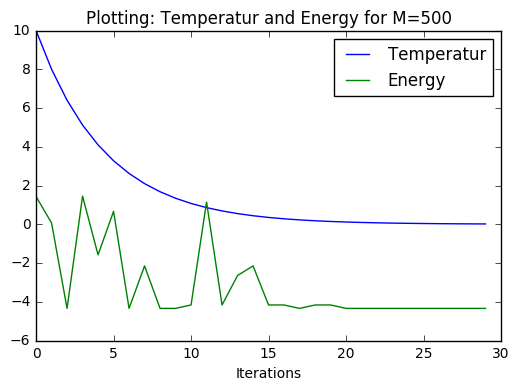

In [68]:
plt.plot((np.arange(t_max)),Tm500,label='Temperatur')
plt.plot((np.arange(t_max)),Em500,label='Energy')
plt.legend()
plt.title("Plotting: Temperatur and Energy for M=500")
plt.xlabel('Iterations')

### Plotting:  the energy $E(s)$ for all possible $2^2$

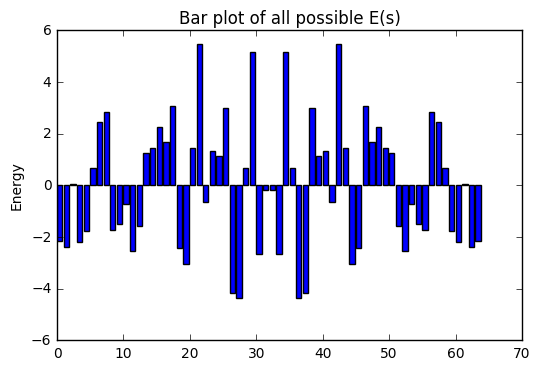

In [69]:
s_ite = np.array(list(it.product([-1,1], repeat=6))).T
all_s=E(s_ite,W)
plt.bar(range(len(all_s)),all_s)
plt.title('Bar plot of all possible E(s)')
plt.ylabel('Energy')

In [70]:
def P(s, W,beta):
    Z= np.exp(-beta*E(s,W)).sum()
    return np.exp(-beta*E(s,W))/Z


### Plot the probabilities P(s) for different β as a bar

In [71]:
np.linspace(1.0,1.2,10)

array([ 1.        ,  1.02222222,  1.04444444,  1.06666667,  1.08888889,
        1.11111111,  1.13333333,  1.15555556,  1.17777778,  1.2       ])

0.0001
0.40008
0.80006
1.20004
1.60002
2.0


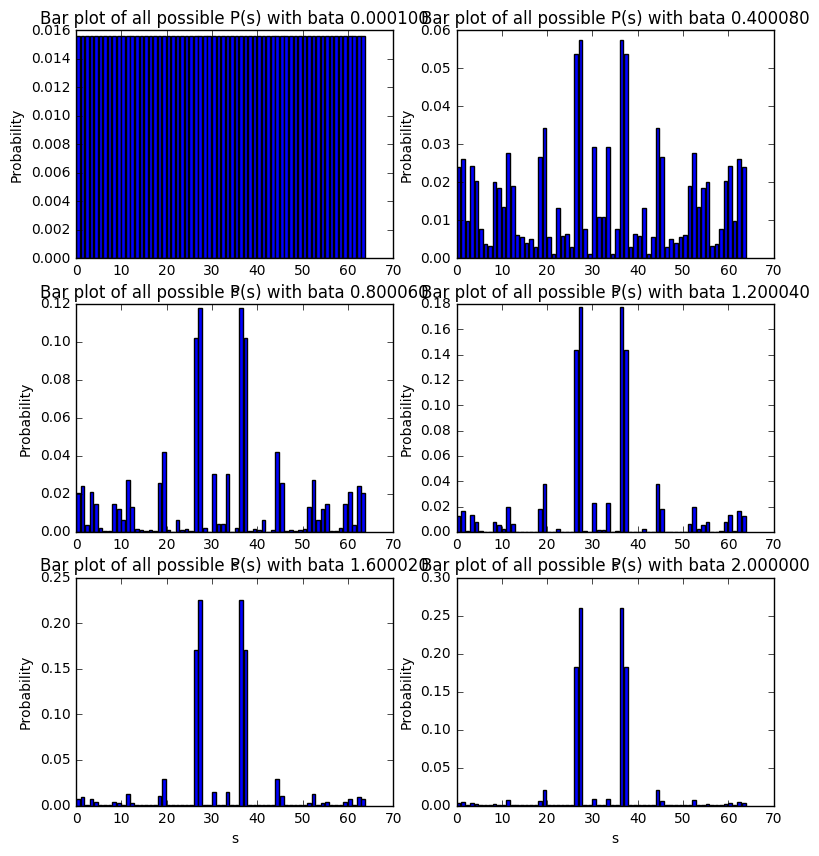

In [72]:
betaset=np.linspace(0.0001,2.00,6)
plt.figure(figsize=(9,10))
ite=1
for i in betaset:
    plt.subplot(3,2,ite)
    print(i)
    prob = P(s_ite , W,i)
    plt.bar(range(len(prob)),prob)
    plt.title('Bar plot of all possible P(s) with bata %f'%i)
    plt.xlabel('s')
    plt.ylabel('Probability')
    ite = ite+1

In [73]:
import numpy as np
import numpy.testing as npt
from scipy.linalg import expm
import matplotlib.pyplot as plt
import scipy.spatial, scipy.linalg
from scipy.spatial.distance import pdist
import scipy.sparse.linalg
from scipy.linalg import eigh
import zipfile,io
import pandas as pd
import zipfile
import re
import time
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
%matplotlib inline


## 8.2 Mean-Field Annealing

Mean-field annealing is a deterministic approximation of simulated annealing. During optimization each node i corresponds to the first moment of si and thus takes continuous instead of binary values. The states si represent the mean with respect to the factorized distribution Q(s) ≈ P(s). Consider again a fully connected network with N = 6 nodes. The cost (energy) function remains the same:

\begin{eqnarray}
E(s)= -\frac{1}{2} \sum^{N}_{i,j=1} w_{ij} s_i s_j
\end{eqnarray}

where the $w_{ij} \in \mathbb{R}$ are symmetric, and $w_{ij}= 0$. The approximated probability of a state s is now given by

\begin{eqnarray}
Q(s)= \frac{1}{Z_Q} \exp(-\beta \sum_j e_j s_j)
\end{eqnarray}

Write a program that finds the optimal configuration s of the network for given weights W

In [74]:
def E(s,W):
    return -(s*np.dot(W,s)).sum(0)/2

def Es(si,s,i,W):
    return -(si*np.dot(W,s)[i])/2


def flipP(s,i,beta,W):
    de = Es(-s[i],s,i,W)-Es(s[i],s,i,W)
    pr=(1/(1+np.exp(beta*de)))[0]
    c=np.random.choice([-1,1],1,p=[pr,1-pr])
    return s[i]*c

### Initialize

In [75]:
M =[1,500]
W = np.array([[ 0.         , 0.34537651, -0.27912426,  1.13818795, -0.78197224,  0.5576804 ],
 [ 0.34537651,  0.         , 0.23829984,  0.15651891,  1.58083954, -0.40823943],
 [-0.27912426,  0.23829984 , 0.         , 0.06297639,  0.30111993, -0.11186265],
 [ 1.13818795,  0.15651891,  0.06297639,  0.        , -0.49991177, -0.65784847],
 [-0.78197224,  1.58083954,  0.30111993, -0.49991177,  0.         , 0.50802284],
 [ 0.5576804 , -0.40823943 ,-0.11186265, -0.65784847,  0.50802284  ,0.        ]])
beta = 0.1
tau = 1.25
t_max = 40
eps=0.001

In [76]:
s = np.random.randn(6)
s

array([ 0.87902234, -2.05396849,  2.29324072, -0.06332327,  1.24067541,
        0.65315744])

### Optimization:

In [77]:
Tt = np.empty(t_max)
Et = np.empty(t_max)
for t in range(t_max):
    Tt[t]= 1/beta
    Et[t] = E((np.array(s)).reshape(len(s),1),W)
    diff = eps+1
    while(diff>=eps):
        diff = 0
        for i in range(len(s)):
            e_old = -np.dot(W[i],s.reshape(len(s),1))
            s[i] = np.tanh(-beta*e_old)
            e_new = -np.dot(W[i],s.reshape(len(s),1))
            diff=diff+np.abs(e_new -e_old)
    beta = beta*tau


        

In [78]:
s

array([-1.,  1.,  1., -1.,  1.,  1.])

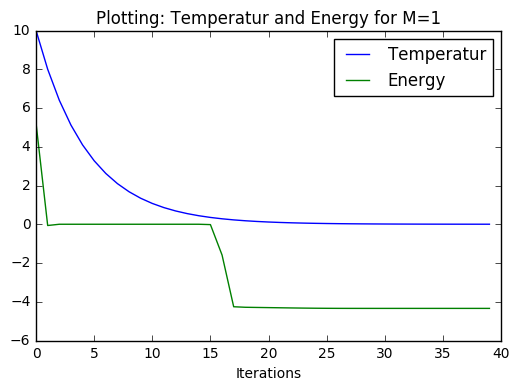

In [79]:
plt.plot((np.arange(t_max)),Tt,label='Temperatur')
plt.plot((np.arange(t_max)),Et,label='Energy')
plt.legend()
plt.title("Plotting: Temperatur and Energy for M=1")
plt.xlabel('Iterations')